In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

csv_file_path = os.getenv('HOME')+'/aiffel/fundamentals/data_preprocess/trade.csv'
trade = pd.read_csv(csv_file_path)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


:trade.csv 파일은 [관세청 수출입 무역 통계](https://unipass.customs.go.kr/ets/index.do) 가공 데이터 <br/>
특정 국가에 대한 월별 수출입 건수와 금액(단위:천 불(USD 1,000))이 있고, 무역수지는 수출금액-수입금액이다.

## 1. Missing Data

**Method of processing the missing data**

* Remove missing data
* Substitute missing data for some value



: There are many ways to replace missing data, but each data must be solved by reflecting its characteristics.

In [3]:
# 결측치 파악
print('컬럼별 결측치 개수')
len(trade) - trade.count()

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [4]:
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [5]:
# DataFrame.isnull()은 데이터마다 결측치 여부를 True, False로 반환
trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [6]:
# DataFrame.any(axis=1)는 행마다 하나라도 True가 있으면 True, 
# 그렇지 않으면 False를 반환
trade.isnull().any(axis=1)    # '각 행이 결측치가 하나라도 있는지' 여부를 불리언 값으로 가진 Series가 출력

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [7]:
# 값이 True인 데이터 즉, 결측치를 갖는 데이터만 추출
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


: index 191은 무역수지, 수출금액만 결측치인 반면, 196 ~ 198은 기간과 국가명을 제외하고 모두 결측치이므로 **191은 결측치 특정값으로 대체, 196 ~ 198 인덱스 삭제**

In [8]:
# DataFrame의 dropna 사용: 결측치를 삭제해주는 메서드
# subset: 특정 컬럼 선택
# how: 선택한 컬럼 전부가 결측치인 행을 삭제하겠다는 의미로 'all'(any: 하나라도 결측치인 경우)
# inplace: DataFrame 내부에 바로 적용
trade.dropna(how='all', subset=['수출건수',\
                                '수출금액',\
                                '수입건수',\
                                '수입금액',\
                                '무역수지'],\
             inplace=True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [9]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


**The missing data complementary method of numerical data**

* Specify a sepcific value; however, if you have many missing values, if all are replaced by the same value, the variance of the data may become smaller than it actually is.
* Replace it with mean, median, etc. If there are many missing values, as when replaced with a secific value at No.1, the variance of the data may become smaller than it actually is.
* Use the other data to replace it with a prediction; for example, a machine learning model can create a US prediction in February 2022, which can complement for missing value.
* For data with series properties, you can replace missing data through front and back data. For example, if missing values occur in sensor data that measures temperature, they can be supplemented by the mean of the postwar data.

In [10]:
# In this case, using a No.4
# DataFrame.loc[행 라벨, 열 라벨]
trade.loc[[188, 191, 194]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [11]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [12]:
trade.loc[191, '무역수지'] = trade.loc[191, '수출금액'] - [trade.loc[191, '수입금액']]
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


**The missing data complementary method of categorical data**

* Specify a specific value; you can create new categories, such as ‘other’ and ‘missing’, to fill the missing values.
* The most empty value is replaced by the least empty value. If the missing value is high, the least empty value may be excessive.
* Other data can be used to replace it with a predictive value.
* For data with time series properties, you can replace missing values through front and back data.For example, if a specific person's 2019 job is missing, and the 2018 and 2020 jobs are consistent, it can be supplemented by that value; if it is different, make it one of two.

## 2. Duplicated Data

In [13]:
# duplication data check
trade.duplicated()   # Returns duplicated data to a boolean values

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [14]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [15]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [16]:
# In pandas, DataFrame.drop_duplicates easily delete duplicated data
trade.drop_duplicates(inplace = True)
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [17]:
# duplicated data removal completion
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


**Ex.01)**

In [18]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


In [19]:
 df.drop_duplicates(subset=['id'], keep='last')

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


**DataFrame.drop_duplicates(Parameters)**

* subset: column label or sequence of labels, optional
    * only consider certain columns for identifying duplicates, by default use all of the columns.
* keep: {'first', 'last', False}, default 'first'
    * Determines which duplicates (if any) to keep. - first : Drop duplicates except for the first occurrence. - last : Drop duplicates except for the last occurrence. - False : Drop all duplicates.
* inplace: bool, default False
    * Whether to drop duplicates in place or to return a copy
* ignore_index: bool, default False
    * if True, the resulting axis will be labeled 0, 1, ..., n-1

## 3. Outilier

**Way to detect outilier**

: The frequently used method is the Z-score method using the mean and standard deciation.

$$ z = X - \mu / \sigma$$

**The processing method after the outilier detection**

* There are ways to delete outilier from the original data and analyze them separately.
* Replace an outilier with a different value; if there is less data, it may be better to replace it with a different value than to delete it. For example, you can limit the range of data by setting the maximum and minimum values.
* Use other data to create a prediction model to leverage the predictions, as you do with missing values.
* Binning turns numerical data into categorical.


**z-score method**

* <span style="background-color: #f5f0ff">abs(df[col] - np.mean(df[col])):</span> The absolute value is taken to subtract the average from data
* <span style="background-color: #f5f0ff">abs(df[col] - np.mean(df[col]))/np.std(df[col]):</span> Divide the work above into standard deviations.
* <span style="background-color: #f5f0ff">df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index:</span> Extracts the index of data with a value greater than z.

In [20]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [21]:
trade.loc[outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [22]:
trade.loc[outlier(trade, '무역수지', 2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [23]:
trade.loc[outlier(trade, '무역수지', 3)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


: The larger the referenced value, the less the outlier it can be confirmed.

In [24]:
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col])) / np.std(df[col]) <= z].index
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [25]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


**IQR method**

In [26]:
# Ex) 이상치가 포함된 임의의 데이터
np.random.seed(2020)
data = np.random.randn(100) # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))  # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

<function matplotlib.pyplot.show(close=None, block=None)>

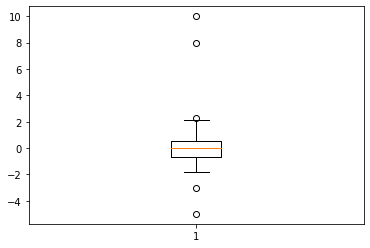

In [27]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show

$$ IQR = Q_3 - Q_1 $$

: IQR is a value that subtracts the first quartile value from the third quartile and is considered to be a range of 50% of the data.

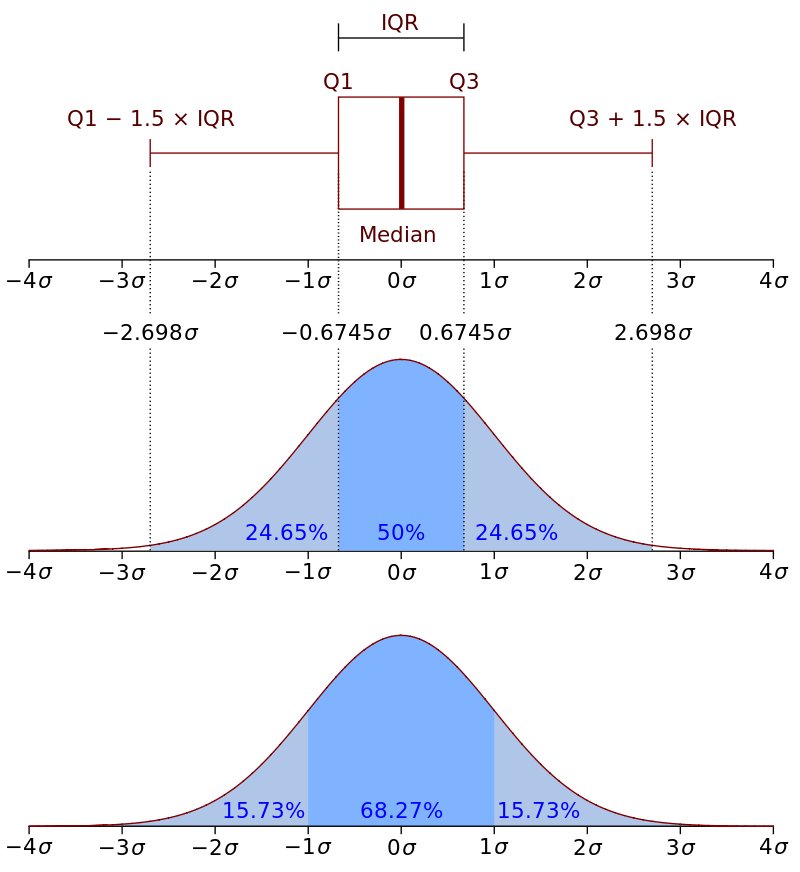

[wikipidia IQR](https://en.wikipedia.org/wiki/Interquartile_range)

In [28]:
Q3, Q1 = np.percentile(data, [75, 25])
IQR = Q3 - Q1
IQR

1.1644925829790964

In [29]:
data[(Q1 - 1.5 * IQR > data)|(Q3 + 1.5 * IQR < data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

In [30]:
# 무역수지를 기준으로 이상치 찾기
def outlier2(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1 - 1.5 * iqr)|(df[col] > q3 + 1.5 * iqr)]

outlier2(trade, '무역수지')

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


## 4. Normalization

: Generally, data is normalized during preprocessing if the range is significantly different between columns.

* Standardization: The **mean** of data is **0** and the **variance** is **1**

$$\frac{X-\mu}{\sigma}$$

* Min-Max Scaling: The **minimum value** of data is **0** and the **maximum value** is **1**

$$ \frac{X-X_\min}{X_\max-X_\min} $$ 

In [31]:
# 정규분포를 따라 랜덤하게 데이터 x 생성
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

,A,B
0,6.205792,-1.485248
1,-0.604047,-0.727779
2,3.018785,-0.517099
3,3.323325,-0.414949
4,6.167679,-0.582630
...,...,...
95,5.062917,-1.122239
96,-0.166839,-2.487547
97,-4.230178,0.589513
98,-0.562115,0.779614


In [39]:
# x를 Standardization으로 정규화
x_standardization = (x - x.mean())/x.std()
x_standardization

,A,B
0,0.559307,-0.314995
1,-1.132240,0.407499
2,-0.232338,0.608450
3,-0.156691,0.705884
4,0.549839,0.545945
...,...,...
95,0.275419,0.031252
96,-1.023639,-1.271014
97,-2.032961,1.663966
98,-1.121824,1.845290


In [40]:
# min-max scaling으로 정규화
x_min_max = (x - x.min()) / (x.max() - x.min())
x_min_max

,A,B
0,0.607216,0.426240
1,0.267692,0.571821
2,0.448318,0.612312
3,0.463502,0.631944
4,0.605316,0.599717
...,...,...
95,0.550235,0.496008
96,0.289490,0.233606
97,0.086901,0.824995
98,0.269782,0.861531


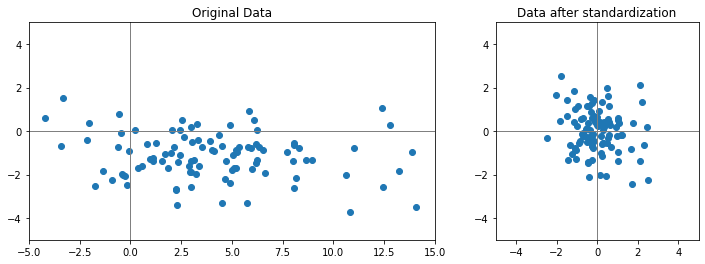

In [41]:
# Standardization Normalization
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

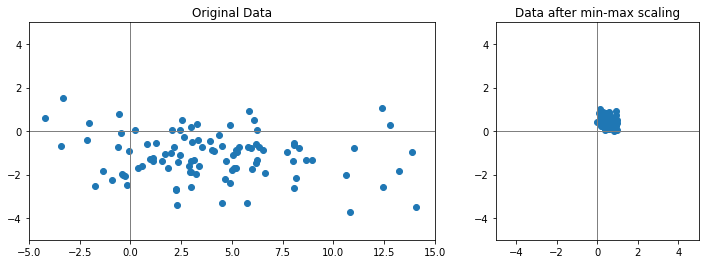

In [36]:
# min-max scaling normalization
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

**trade data normalization**

In [42]:
# trade 데이터를 Standardization 기법으로 정규화
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']   # 정규화 시켜야 할 수치형 컬럼들을 cols변수에 담는다.
trade_Standardization= (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_Standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.256342
1,-0.689278,-0.252848,0.412529,-0.964444,0.401088
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.097779
3,-0.417598,0.852853,-0.576399,0.705292,0.832209
4,-0.764918,-0.389673,0.146306,-1.276341,0.438027


In [43]:
trade_Standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.093143e-16,6.832142e-17,1.821904e-17,-5.465713e-17,2.277381e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.603764e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.116765e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.426824e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.461637e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.434109e+00


In [44]:
# trade 데이터를 min-max scaling 기법으로 정규화 
trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660


In [45]:
trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397180
std,0.156108,0.302099,0.235988,0.273790,0.247655
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


**If train data and test data are divided, test data should be normalized as it is normalized.**

In [46]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [48]:
train_min = train.min()
train_max = train.max()

train_min_max = (train - train_min) / (train_max - train_min)
test_min_max = (test - train_min) / (train_max - train_min) # test를 min-max scaling할 때도 train 정규화 기준으로 진행
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [49]:
train_min_max

,0,1
0,0.0,0.0
1,0.5,1.0
2,1.0,0.5


In [50]:
test_min_max

,0,1
0,-0.25,0.55
1,0.00,1.00


**StandardScaler, MinMaxScaler of scikit-learn**

In [51]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()
print("👽 It's okay, no biggie.")

👽 It's okay, no biggie.


In [52]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [53]:
scaler.transform(test)

array([[-0.25,  0.55]])

## 5. One-Hot Encoding 

: If it do not support categorical types in machine learning or deep learning framework, do one-hot-encoding.
<br/>
: It's a method of making binary characteristics by category and making only the corresponding characteristics 1 and the rest 0.
.

In [54]:
# get_jummies of pandas
# trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [55]:
# pd.concat
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


In [56]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0
